In [22]:

import datetime
import time
from tqdm import tqdm
import requests

from github import Github
from github.GithubException import RateLimitExceededException


In [27]:

def search_github(auth: Github) -> list:

    print('Searching GitHub for repositories with ipynb')

    query = 'language:Jupyter Notebook'
    results = auth.search_repositories(query, 'stars', 'desc')

    print(f'Found {results.totalCount} repo(s)')

    results_list = []
    for repo in tqdm(range(0, min(100, results.totalCount))):
        try:
            results_list.append([results[repo].name, results[repo].url, results[repo].watchers_count, len(requests.get(results[repo].contributors_url).json())])
            time.sleep(2)
        except RateLimitExceededException:
            time.sleep(60)
            results_list.append([results[repo].name, results[repo].url, results[repo].description])

    return results_list

If you want to download new data insert your token

In [40]:
token = ""

In [28]:
# search repositories on GitHub
auth = Github(token)
github_results = search_github(auth)
filename = 'results.txt'
# write out results
timestamp = datetime.datetime.now()

print('Writing search results to: {}'.format(filename))
with open(filename, 'w') as f_out:
    for res in github_results:
        f_out.write(str(res[0]) + '\t' + str(res[1]) + '\t' + str(res[2]) + '\t' + str(res[3]) + '\n')

f_out.close()   

Searching GitHub for repositories with ipynb
Found 1000 repo(s)


100%|██████████| 100/100 [03:54<00:00,  2.34s/it]

Writing search results to: results.txt


In [31]:
import matplotlib.pyplot as plt

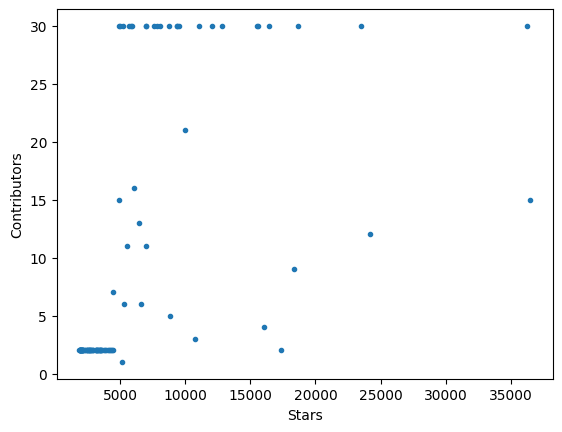

In [41]:
x = []
y = []

with open('results.txt') as f:
    lines = f.readlines()
    for line in lines:
        splitted = line.split() 
        x.append(int(splitted[2]))
        y.append(int(splitted[3]))

xs, ys = zip(*sorted(zip(x, y)))

plt.plot(xs,ys, '.')
plt.xlabel('Stars')
plt.ylabel('Contributors')
plt.show()
